In [1]:
import yaml
import numpy as np
from scipy import signal
import scipy.stats
import matplotlib.pyplot as plt
from TraceSimulator import TraceSimulator

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('../archive/config.yaml')
ts = TraceSimulator(config)

In [2]:
trace = ts.generate(E=5000, x=-40, y=80, z=-1800, no_noise=True, type_recoil='NR', quantize=True, phonon_only=False) 



15.396 17.82 2


((-10.0, 2854.95), ([], []))

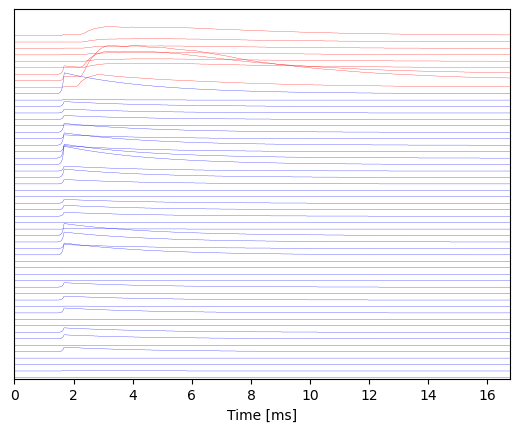

In [6]:
times = 0.5 * (ts.t_edges[1:] + ts.t_edges[:-1])
for i in range(54):
    if i > 44:
        plt.plot(times * 1e-6, trace[0][i] + i * 50, c='r', lw=0.2)
    else:
        plt.plot(times * 1e-6, trace[0][i] + i * 50, c='b', lw=0.2)
        
plt.xlim(0, np.max(times * 1e-6)), plt.xlabel('Time [ms]')
plt.ylim(-10), plt.yticks([])


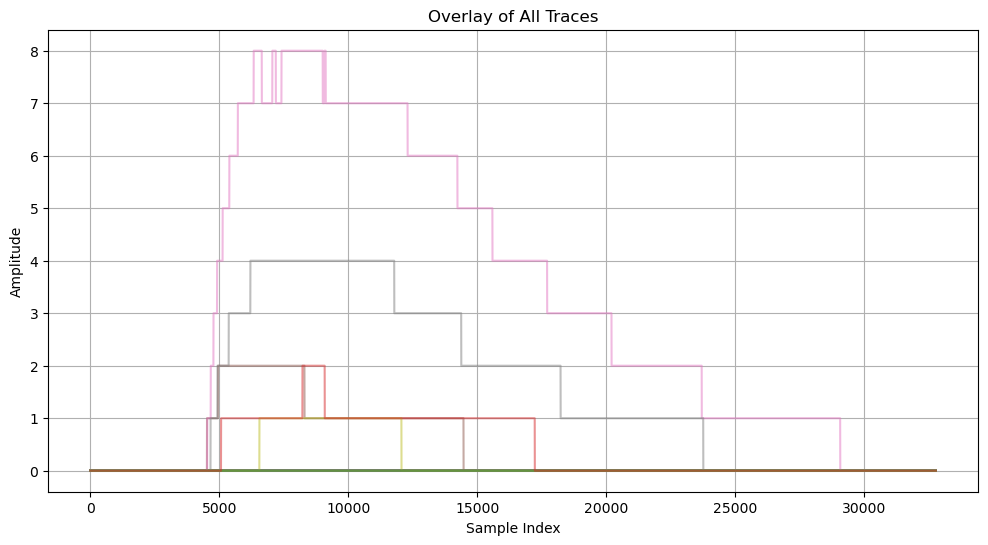

In [9]:
trace = trace.squeeze(0)
# Plot 1: Overlay of all traces
plt.figure(figsize=(12, 6))
for i in range(trace.shape[0]):
    plt.plot(trace[i], alpha=0.5)
plt.title('Overlay of All Traces')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [12]:
print(N_uv, N_tr, N_ir, N_ph)

[0] [0] [0] [100000]


In [4]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm  # Optional for progress bar

# Assuming `ts.generate` is your function to generate traces
# Define the energy range
energies = np.arange(0, 151, 2)
num_traces_per_energy = 200
num_threads = 10

empty_rates = []

def check_empty(E):
    empty_count = 0
    for _ in range(num_traces_per_energy):
        trace = ts.generate(
            E=E, x=-40, y=80, z=-1800, no_noise=True, type_recoil='NR', quantize=True, phonon_only=False
        )
        if np.all(trace <= 5):
            empty_count += 1
    return empty_count / num_traces_per_energy

# Multithreading across energy points
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    results = list(tqdm(executor.map(check_empty, energies), total=len(energies)))

empty_rates = np.array(results)

# This is your final result: 1D array of empty rates for each energy
print(empty_rates)


  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████| 76/76 [31:30<00:00, 24.88s/it]  

[1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    0.99  1.    1.    0.995 0.99  0.99  0.98
 0.975 0.985 0.985 0.98  0.98  0.96  0.955 0.935 0.935 0.88  0.825 0.685
 0.51  0.36  0.275 0.13  0.09  0.11  0.1   0.085 0.045 0.03  0.045 0.01
 0.005 0.015 0.015 0.005 0.005 0.005 0.    0.    0.    0.    0.    0.
 0.    0.005 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


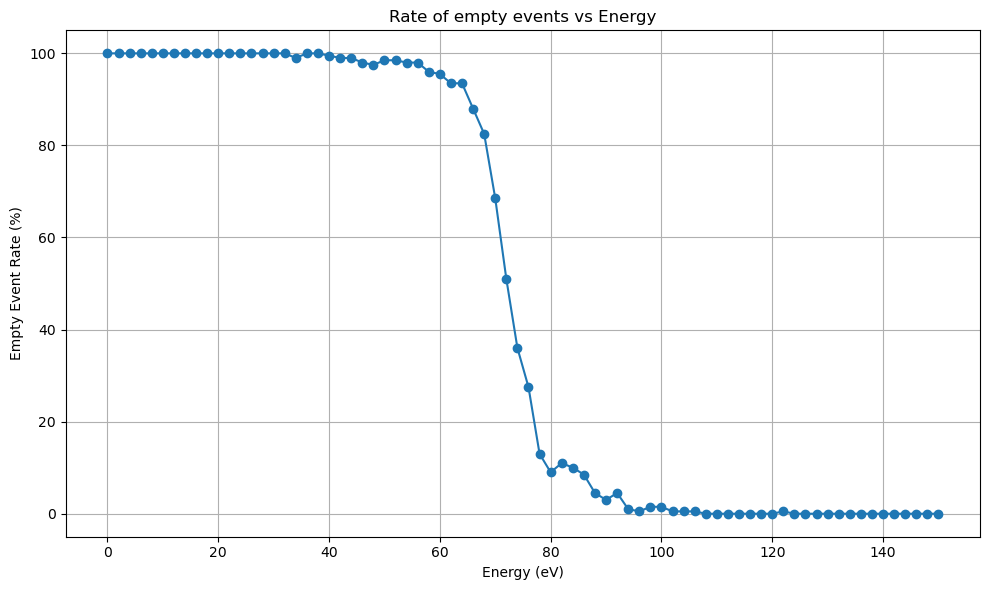

In [5]:
import numpy as np
import matplotlib.pyplot as plt



# Convert empty rates to percentage
empty_rates_percent = empty_rates * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energies, empty_rates_percent, marker='o')
plt.title('Rate of empty events vs Energy')
plt.xlabel('Energy (eV)')
plt.ylabel('Empty Event Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Define the energy range
energies = np.arange(0, 251, 2)
num_traces_per_energy = 200
num_threads = 10

# Function to compute averages for each energy
def compute_averages(E):
    sum_uv = 0
    sum_tr = 0
    sum_ir = 0
    sum_ph = 0
    for _ in range(num_traces_per_energy):
        _, N_uv, N_tr, N_ir, N_ph = ts.generate(
            E=E, x=-40, y=80, z=-1800, no_noise=True, type_recoil='NR', quantize=True, phonon_only=False
        )
        # Extract scalar values from arrays
        sum_uv += N_uv[0]
        sum_tr += N_tr[0]
        sum_ir += N_ir[0]
        sum_ph += N_ph[0]
    return np.array([E, sum_uv / num_traces_per_energy, sum_tr / num_traces_per_energy, sum_ir / num_traces_per_energy, sum_ph / num_traces_per_energy])

# Multithreading across energy points
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    results = list(tqdm(executor.map(compute_averages, energies), total=len(energies)))

# Stack results into a 2D array
avg_particles = np.vstack(results)

# Final result: each row is [E, avg_N_uv, avg_N_tr, avg_N_ir, avg_N_ph]
print(avg_particles)

  0%|          | 0/126 [00:00<?, ?it/s]

100%|██████████| 126/126 [59:23<00:00, 28.28s/it] 

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.00000000e+03]
 [4.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.00000000e+03]
 [6.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.00000000e+03]
 [8.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.00000000e+03]
 [1.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+04]
 [1.20000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.20000000e+04]
 [1.40000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.40000000e+04]
 [1.60000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.60000000e+04]
 [1.80000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.80000000e+04]
 [2.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.00000000e+04]
 [2.20000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.20000000e+04]
 [2.40000000e+01 5.00000000e-03 0.000000

In [5]:
avg_particles.shape

(126, 5)

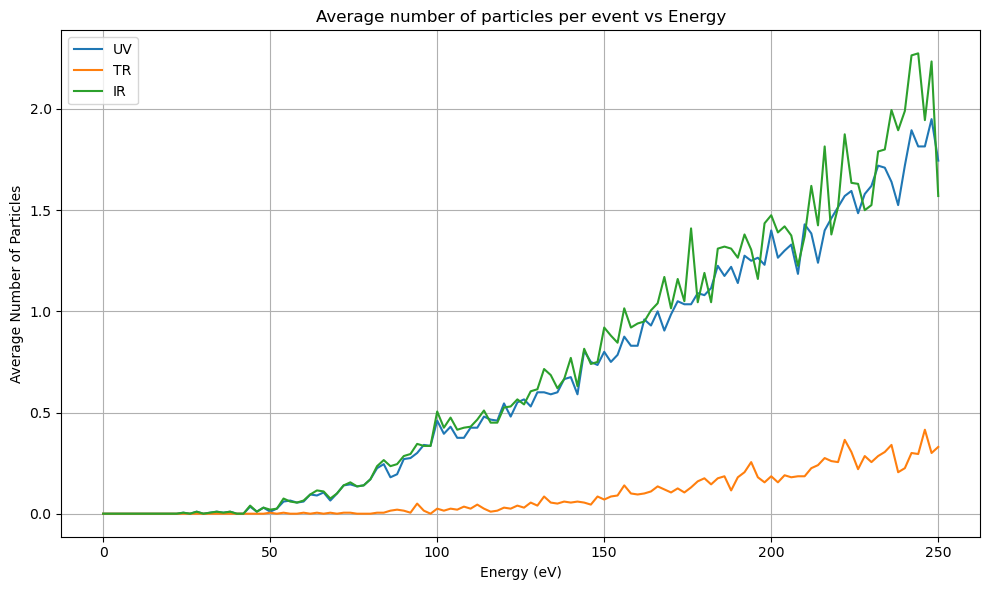

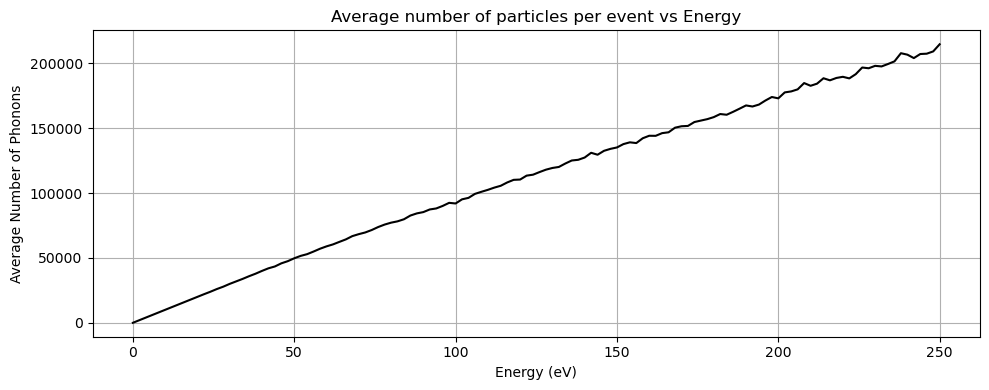

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(avg_particles[:, 0], avg_particles[:, 1], label='UV')
plt.plot(avg_particles[:, 0], avg_particles[:, 2], label='TR')
plt.plot(avg_particles[:, 0], avg_particles[:, 3], label='IR')
plt.xlabel('Energy (eV)')
plt.ylabel('Average Number of Particles')
plt.title('Average number of particles per event vs Energy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Separate plot for PH
plt.figure(figsize=(10, 4))
plt.plot(avg_particles[:, 0], avg_particles[:, 4], label='PH', color='black')
plt.xlabel('Energy (eV)')
plt.ylabel('Average Number of Phonons')
plt.title('Average number of particles per event vs Energy')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
trace = ts.generate(E=100, x=-40, y=80, z=-1800, no_noise=False, type_recoil='NR', quantize=True, phonon_only=False) 
times = 0.5 * (ts.t_edges[1:] + ts.t_edges[:-1])
for i in range(54):
    if i > 44:
        plt.plot(times * 1e-6, trace[0][i] + i * 50, c='r', lw=0.2)
    else:
        plt.plot(times * 1e-6, trace[0][i] + i * 50, c='b', lw=0.2)
        
plt.xlim(0, np.max(times * 1e-6)), plt.xlabel('Time [ms]')
plt.ylim(-10), plt.yticks([])